## estimasi nilai $\pi$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N= 100
M= 500# Jumlah pengulangan pada simulasi MC
def estpi(N=100):
  q=0
  r=4
  for i in range(N):
    x=np.random.uniform(-r,r)
    y=np.random.uniform(-r,r)
    if np.sqrt(x**2+y**2)<=r:
      q=q+1
  return 4*q/N
# print("$pi$ estimation: ", 4*q/N)

In [ ]:
## plot pengaruh banyaknya experiment N dengan hasil
nr=100
v_N=[100*i for i in range(1,nr)]
v_pi = [estpi(k) for k in v_N]

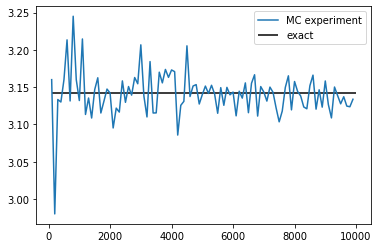

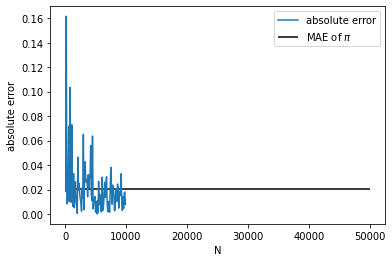

In [ ]:
plt.plot(v_N,v_pi, label='MC experiment')
plt.hlines(np.pi, xmin=100, xmax=100*nr, label="exact")
plt.legend()
plt.show()
plt.plot(v_N,[abs(np.pi-k) for k in v_pi], label="absolute error")
plt.hlines(np.array([abs(np.pi-k) for k in v_pi]).mean(), xmin=100, xmax=100*M,label='MAE of $\pi$')
plt.xlabel("N")
plt.ylabel("absolute error")
plt.legend()

## Selang Kepercayaan 95% dari nilai estimasi

$\hat{\pi} \in [\mu_{\hat{\pi}} - z\cdot \sigma_{\hat{\pi}}, \mu_{\hat{\pi}} + z\cdot \sigma_{\hat{\pi}}] $,

dengan $z=1.96$

In [ ]:
from numpy.ma.core import mean
#Selang kepercayaan 95% estimasi pi
M=5000
val=[]
for i in range(M):
  val= val +[estpi(N=100)]

meanest=np.mean(val)
stdest= np.std(val)
z=1.96
print("mean est. $\pi$= ", meanest)
print("standars deviasi est. $\pi$= ", stdest)
print("selang: [",meanest-z*stdest, ", ",meanest+z*stdest, "]" )

mean est. $\pi$=  3.1388879999999997
standars deviasi est. $\pi$=  0.16461750652953044
selang: [ 2.81623768720212 ,  3.461538312797879 ]


## Cara-1 integral MC (Average)

In [ ]:
def easy_func(x):
  return 3*x**2

def norm_func(x):
  return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

In [ ]:
# Rectangular integral
def int_rec(x1,x2, func=easy_func, n=500):
    dx = (x2-x1)/n
    Xs= np.linspace(x1,x2,n+1)
    return np.sum(func(Xs))*dx

def int_trapez(x1,x2, func=easy_func, n=100):
  dx = (x2-x1)/n
  Xs= np.linspace(x1,x2,n+1)
  return int_rec(x1,x2, func, n)-0.5*(x1+x2)/n
  # return dx*(func(Xs[0])+2*np.sum(func(Xs[1:-2])+func(Xs[-1])))/2


In [ ]:
print(int_rec(-5,5, func=norm_func, n=100),int_trapez(-5,5, func=norm_func, n=100) )


0.9999995630247152 0.9999995630247152


In [ ]:
## integram monte carlo dari nilai rata-rata (MC cara-1)

## generate random number, evaluasi f, hitung rata2 dan variansi, tentukan selang kepercayaan
N=500
f = []
vx = []
for i in range(N):
  x= np.random.uniform(-5,5)
  vx = vx +[x]
  f = f+[easy_func(x)]

print("rata-rata f: ", np.mean(np.array(f)))
print("std.Dev f: ", np.std(np.array(f)))


rata-rata f:  25.510670126860276
std.Dev f:  22.726992492140557


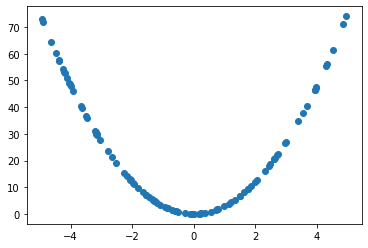

In [ ]:
plt.scatter(vx, f)

## Cara 2 simulasi MC

In [ ]:
func=norm_func
M=100
def mc2():
  N=10000
  a=-5
  b=5
  xs = np.linspace(a,b,101)
  fmin=np.min(func(xs))
  fmax= np.max(func(xs)+1)
  q=0
  for i in range(N):
    x=np.random.uniform(a,b)
    y= np.random.uniform(fmin,fmax)
    if y<=func(x):
      q=q+1
  return q/N*(b-a)*(fmax-fmin)

mcexp = []
for i in range(M):
  mcexp = mcexp+[mc2()]

In [ ]:
print("average int MC-2: ", np.mean(np.array(mcexp)))
print("std.Dev int MC-2: ", np.std(np.array(mcexp)))

average int MC-2:  0.9954303111523055
std.Dev int MC-2:  0.038638288872783026


In [ ]:
 mu =np.mean(np.array(mcexp))
 sig = np.std(np.array(mcexp))
 # tentukan interval hasil MC-2 dengan selang kepercayaan 95%
  ### [mu-1.96*sig, mu+1.96*sig]
 print("selang hasil integral MC dengan kepercayaan 95%: [", mu-1.96*sig, ", ", mu+1.96*sig, "]")

selang hasil integral MC dengan kepercayaan 95%: [ 0.9196992649616508 ,  1.0711613573429601 ]
